In [125]:
import matplotlib.pyplot as plt
import warnings 
import cv2
import numpy as np
from pathlib import Path
warnings.filterwarnings(action= 'ignore')

In [126]:
def get_data_from_file(file_path):
    return np.loadtxt(file_path, skiprows=1, usecols=(1,2), unpack=True, delimiter=',')

In [127]:
def plot(x_values_list, y_values_list, series_names, series_colors, x_label, y_label, title, plot_path, y_max):
        for x_values, y_values, series_name, series_color in zip(x_values_list, y_values_list, series_names, series_colors):
            plt.plot(x_values, y_values, label=series_name, color=series_color, visible=True, linewidth=1)
            
        plt.grid()

        plt.gca().set_xlim(xmin=0, xmax=7200)
        plt.gca().set_ylim(ymin=0, ymax=y_max)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        # plt.ylim(ymin=0, ymax=1)
        plt.legend()
        plt.title(title)
        plt.savefig(plot_path / f"{title}.svg", format="svg")
        plt.show()

In [128]:
data_dir = Path("./model_loss_data/")
plot_path = Path("./loss_plots/")
plot_path.mkdir(exist_ok=True)

In [129]:
series_names = ["U-Net256", "U-Net512", "DeepLabV3+256", "DeepLabV3+512"]
series_colors = ["cyan", "blue", "orange", "red"]

In [130]:
unet_256_dice_loss_data_path = data_dir / "unet_256_train_dice_loss.csv"  # Training data Dice loss values for the U-Net model 
unet_512_dice_loss_data_path = data_dir / "unet_512_train_dice_loss.csv"  # Training data Dice loss values for the U-Net model trained on 800x800 resolution images
dl_256_dice_loss_data_path = data_dir / "dl_256_train_dice_loss.csv"  # Training data Dice loss values for the DeepLabV3+ model 
dl_512_dice_loss_data_path = data_dir / "dl_512_train_dice_loss.csv"  # Training data Dice loss values for the DeepLabV3+ model trained on 800x800 resolution images

In [131]:
unet_256_training_steps, unet_256_dice_loss_data = get_data_from_file(unet_256_dice_loss_data_path)
unet_512_training_steps, unet_512_dice_loss_data = get_data_from_file(unet_512_dice_loss_data_path)
dl_256_training_steps, dl_256_dice_loss_data = get_data_from_file(dl_256_dice_loss_data_path)
dl_512_training_steps, dl_512_dice_loss_data = get_data_from_file(dl_512_dice_loss_data_path)

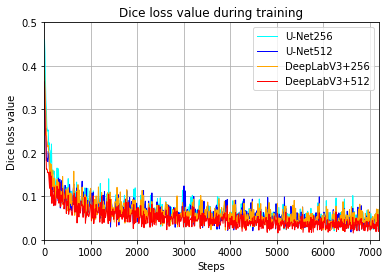

In [132]:
x_data = [unet_256_training_steps, unet_512_training_steps, dl_256_training_steps, dl_512_training_steps]
y_data = [unet_256_dice_loss_data, unet_512_dice_loss_data, dl_256_dice_loss_data, dl_512_dice_loss_data]
x_label = "Steps"
y_label = "Dice loss value"
title = "Dice loss value during training"
plot(x_data, y_data, series_names, series_colors, x_label, y_label, title, plot_path, y_max=0.5)

In [133]:
unet_256_f1_score_data_path = data_dir / "unet_256_train_f1_score.csv"  # Training data F1 score values for the U-Net model 
unet_512_f1_score_data_path = data_dir / "unet_512_train_f1_score.csv"  # Training data F1 score values for the U-Net model trained on 800x800 resolution images
dl_256_f1_score_data_path = data_dir / "dl_256_train_f1_score.csv"  # Training data F1 score values for the DeepLabV3+ model 
dl_512_f1_score_data_path = data_dir / "dl_512_train_f1_score.csv"  # Training data F1 score values for the DeepLabV3+ model trained on 800x800 resolution images

In [134]:
unet_256_training_steps, unet_256_f1_score_data = get_data_from_file(unet_256_f1_score_data_path)
unet_512_training_steps, unet_512_f1_score_data = get_data_from_file(unet_512_f1_score_data_path)
dl_256_training_steps, dl_256_f1_score_data = get_data_from_file(dl_256_f1_score_data_path)
dl_512_training_steps, dl_512_f1_score_data = get_data_from_file(dl_512_f1_score_data_path)

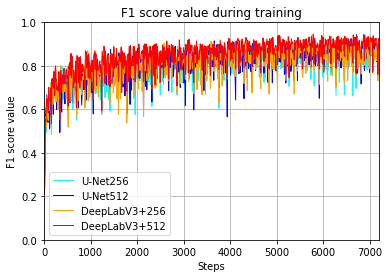

In [136]:
x_data = [unet_256_training_steps, unet_512_training_steps, dl_256_training_steps, dl_512_training_steps]
y_data = [unet_256_f1_score_data, unet_512_f1_score_data, dl_256_f1_score_data, dl_512_f1_score_data]
x_label = "Steps"
y_label = "F1 score value"
title = "F1 score value during training"
plot(x_data, y_data, series_names, series_colors, x_label, y_label, title, plot_path, y_max=1)